In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GLD = pd.read_csv('GLD.csv')
GLDM = pd.read_csv('GLDM.csv')

In [3]:
print(GLD.shape, GLDM.shape)

(1258, 7) (393, 7)


In [4]:
GLD['Returns'] = GLD['Close'].pct_change()*100.0
GLDM['Returns'] = GLDM['Close'].pct_change()*100.0

In [5]:
GLD_last_year = GLD.iloc[-300:]
GLDM_last_year = GLDM.iloc[-300:]

print(GLD_last_year.shape, GLDM_last_year.shape)

(300, 8) (300, 8)


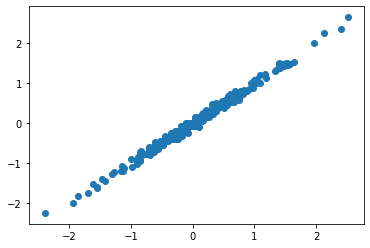

In [6]:
plt.scatter(GLD_last_year['Returns'], GLDM_last_year['Returns'])

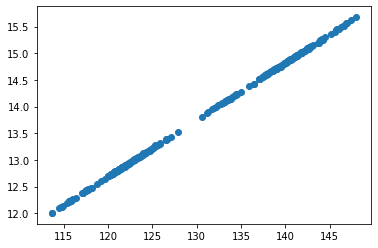

In [7]:
plt.scatter(GLD_last_year['Close'], GLDM_last_year['Close'])

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

test_size = 0.1


X_frame = GLD_last_year
y_frame = GLDM_last_year


X = X_frame['Close'].values.reshape(-1,1)
y = y_frame['Close']
X_returns = X_frame['Returns']
y_returns = y_frame['Returns']


test_index = int(test_size * X.shape[0])
X_train = X[:-test_index]
X_test = X[-test_index:]

y_train = y[:-test_index]
y_test = y[-test_index:]

X_returns_test = X_returns.values[-test_index:]
y_returns_test = y_returns.values[-test_index:]

my_lr = LinearRegression()
my_lr.fit(X_train, y_train)

print(my_lr.coef_[0], my_lr.intercept_)

0.1066401962475688 -0.11025045767892294


In [25]:
beta_1 = my_lr.coef_[0]
beta_0 = my_lr.intercept_

spread_test = X_test.reshape(-1,) * beta_1 + beta_0 - y_test
spread_train = X_train.reshape(-1,) * beta_1 + beta_0 - y_train

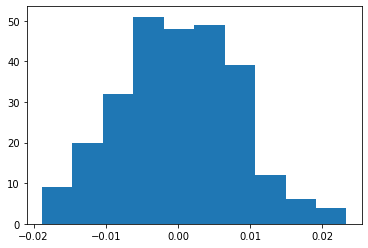

In [26]:
plt.figure()
plt.hist(spread_train)
plt.show()

In [31]:
import math
std_values = []
sharpes = []



for i in range(0, 300):
    std_value = i/100

    X_final_returns = []
    Y_final_returns = []

    spread_mean = np.mean(spread_train)
    spread_std = np.std(spread_train)

    #print(spread_mean, spread_std)
    #std_value = 1.3
    fee = 1.0

    position = 0
    buy_sell_number = 0
    #print(X_test.shape[0])
    for i in range(X_test.shape[0]):


        if (position == 0):
            X_final_returns.append(0.0)
            Y_final_returns.append(0.0)
        elif (position == 1):
            X_final_returns.append(X_returns_test[i])
            Y_final_returns.append(-y_returns_test[i])
        else:
            X_final_returns.append(-X_returns_test[i])
            Y_final_returns.append(y_returns_test[i])


        current_spread = X_test.reshape(-1,)[i] * beta_1 + beta_0 - y_test.iloc[i]



        if (current_spread < (spread_mean - (std_value*spread_std))):
            if (position != 1):
                position = 1
                buy_sell_number += 2
        elif (current_spread > (spread_mean + (std_value*spread_std))):
            if (position != -1):
                position = -1
                buy_sell_number += 2
        else:
            if (position != 0):
                position = 0
                buy_sell_number += 2

    final_returns = np.mean(X_final_returns)*math.sqrt(252)/np.std(X_final_returns)
    final_returns += np.mean(Y_final_returns)*math.sqrt(252)/np.std(Y_final_returns)
    std_values.append(std_value)
    sharpes.append(final_returns)

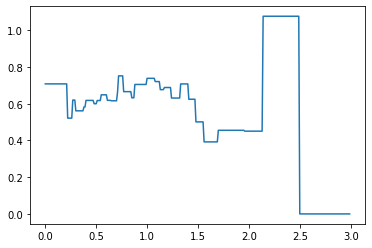

In [32]:
plt.plot(std_values, sharpes)